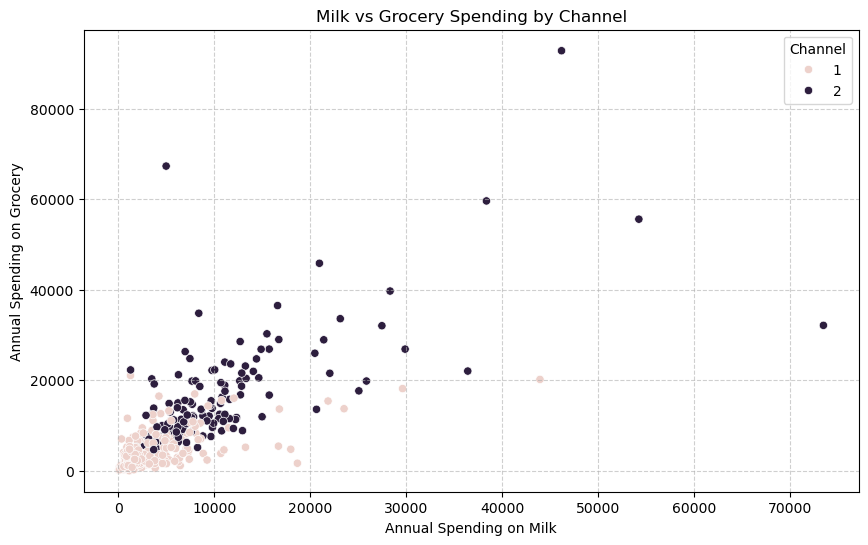

In [1]:
# 1. Install seaborn (only needs to be run once per session)
%pip install seaborn

# 2. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Load your data
df = pd.read_csv('customers.csv')

# 4. Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel')

plt.title('Milk vs Grocery Spending by Channel')
plt.xlabel('Annual Spending on Milk')
plt.ylabel('Annual Spending on Grocery')
plt.grid(True, linestyle='--', alpha=0.6)

# 5. Display the plot
plt.show()


In [2]:
# Map integer values to readable names
channel_map = {1: 'Horeca', 2: 'Retail'}
region_map = {1: 'Lisbon', 2: 'Oporto', 3: 'Other'}

df['Channel_Name'] = df['Channel'].map(channel_map)
df['Region_Name'] = df['Region'].map(region_map)

# Check the first few rows with new columns
df[['Channel_Name', 'Region_Name', 'Fresh', 'Milk']].head()

,Channel_Name,Region_Name,Fresh,Milk
0,Retail,Other,12669,9656
1,Retail,Other,7057,9810
2,Retail,Other,6353,8808
3,Horeca,Other,13265,1196
4,Retail,Other,22615,5410


In [3]:
# Calculate average spending per channel
channel_spending = df.groupby('Channel_Name')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].mean()

# Sort by 'Fresh' spending
channel_spending.sort_values(by='Fresh', ascending=False)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel_Name,,,,,,
Horeca,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
Retail,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


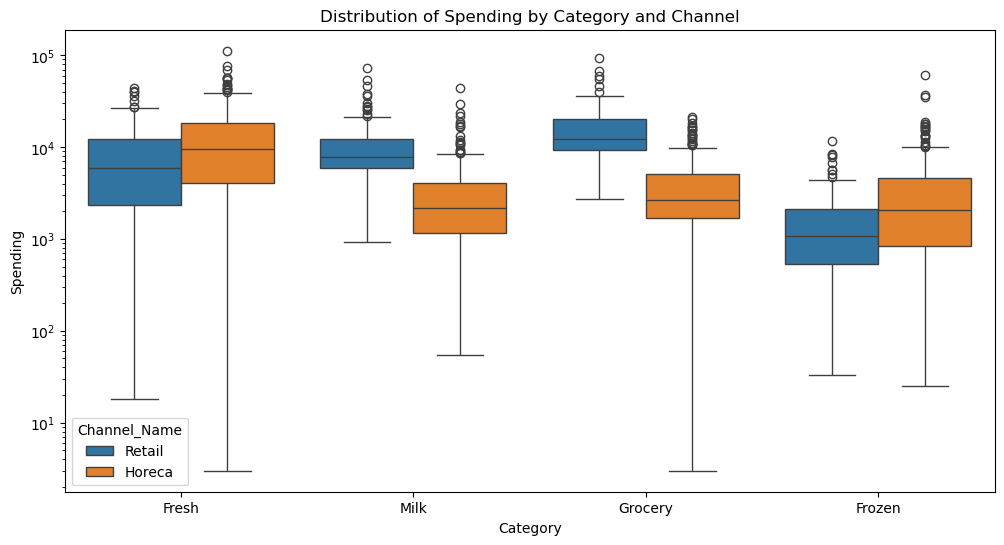

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the data for plotting (melt it)
df_melted = df.melt(id_vars=['Channel_Name'], 
                    value_vars=['Fresh', 'Milk', 'Grocery', 'Frozen'],
                    var_name='Category', value_name='Spending')

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Category', y='Spending', hue='Channel_Name')

plt.title('Distribution of Spending by Category and Channel')
plt.yscale('log') # Use log scale if there are high outliers
plt.show()

In [6]:
# Save the transformed dataframe to a new CSV
df.to_csv('cleaned_customers.csv', index=False)
